In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [12]:
df= pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')

In [13]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [14]:
df.describe

<bound method NDFrame.describe of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]>

In [15]:
df= df.drop(['Date', 'Holiday', 'Seasons'], axis=1)
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Yes


In [16]:
df_cols= ['bike_count', 'hour', 'temp', 'humaidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']
df.columns= df_cols
df

,bike_count,hour,temp,humaidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Yes


In [17]:
df['functional']= (df['functional']== 'Yes').astype(int)
df= df[df['hour']== 12]
df= df.drop(['hour'], axis=1)
df

,bike_count,temp,humaidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
8652,752,9.1,57,1.1,562,1.0,1.69,0.0,0.0,1
8676,672,9.3,61,1.5,390,2.1,0.85,0.0,0.0,1
8700,635,7.9,14,1.7,1688,-18.0,1.81,0.0,0.0,1
8724,661,5.6,27,0.3,1522,-11.9,0.34,0.0,0.0,1


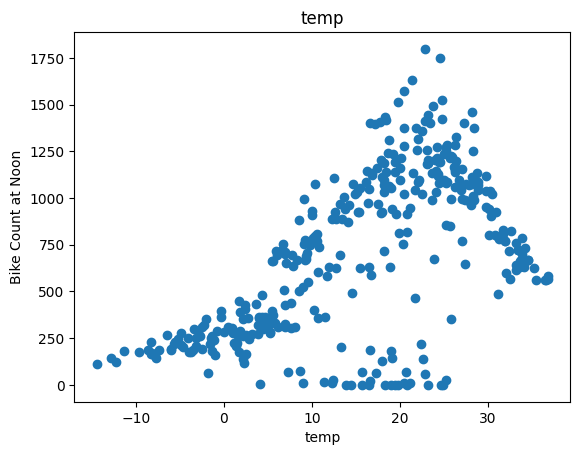

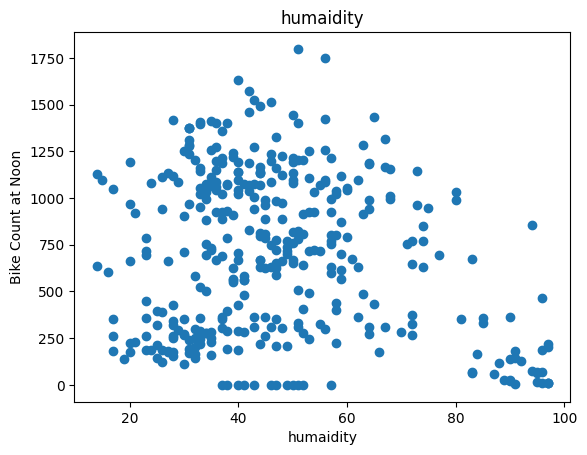

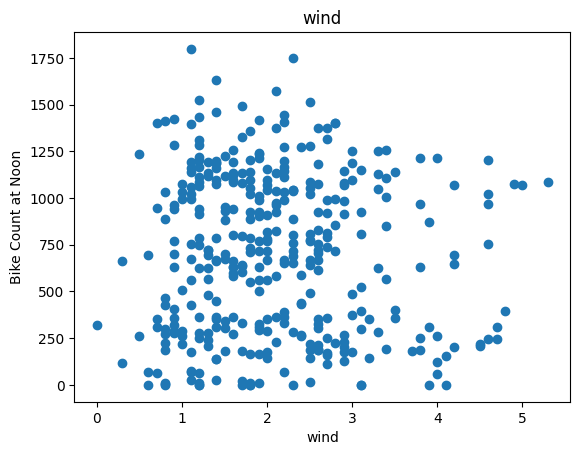

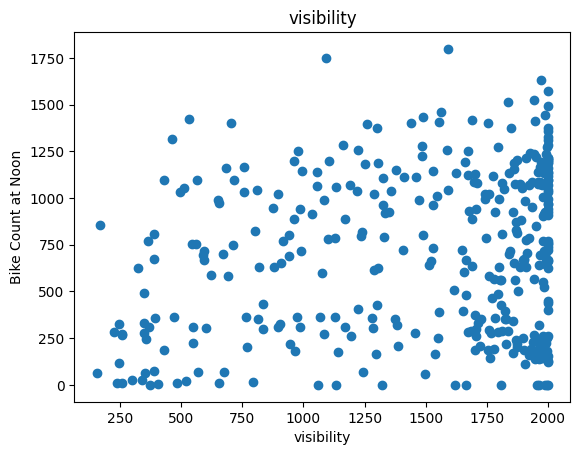

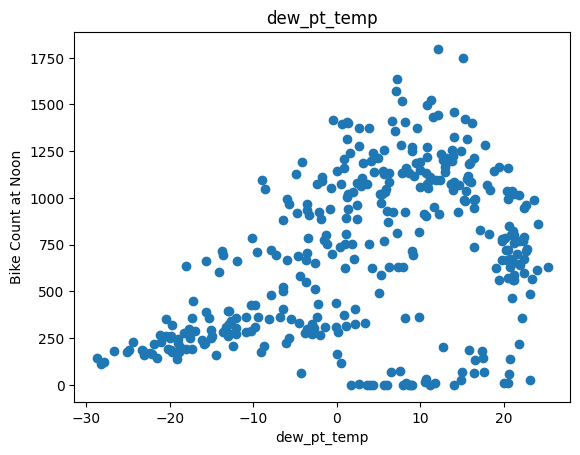

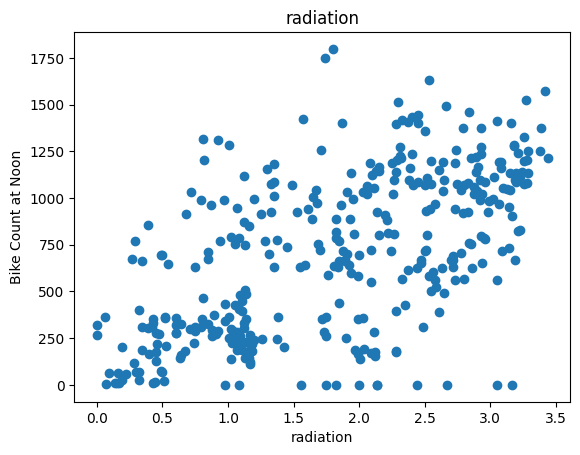

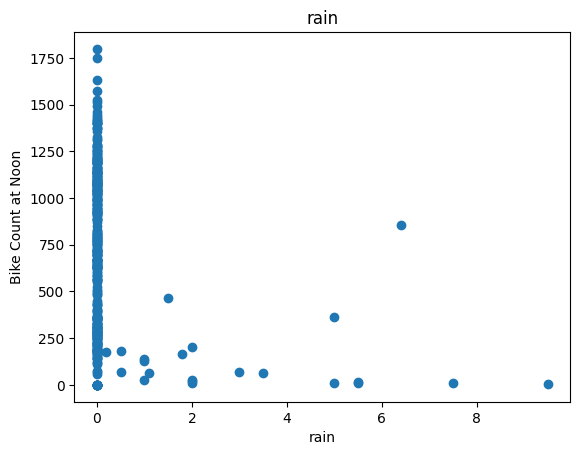

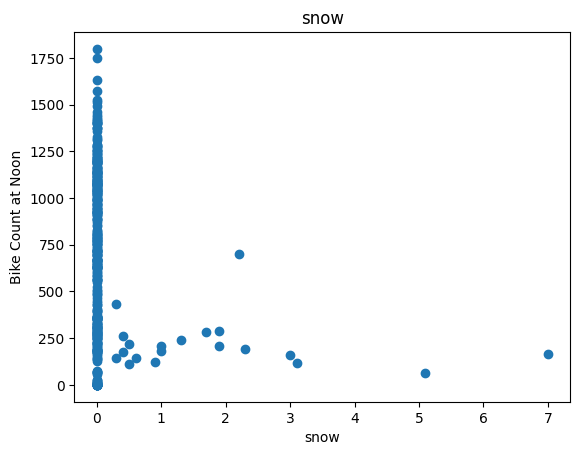

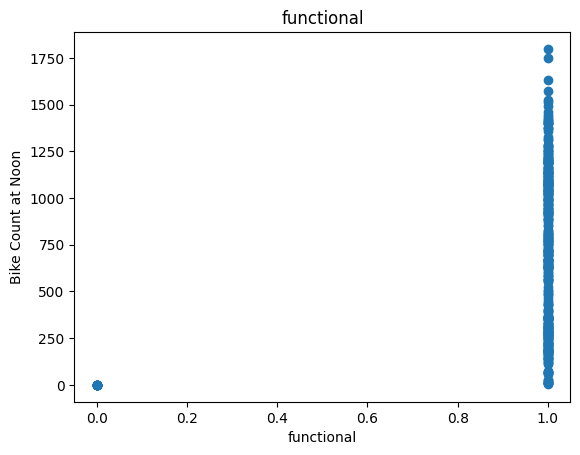

In [18]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.ylabel('Bike Count at Noon')
    plt.xlabel(label)
    plt.show()

In [19]:
df= df.drop(['wind', 'visibility', 'functional'], axis=1)

In [93]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [21]:
#df = df.sample(frac=1).reset_index(drop=True)

#train_end = int(0.6 * len(df))
#valid_end = int(0.8 * len(df))

#train = df.iloc[:train_end]
#valid = df.iloc[train_end:valid_end]
#test = df.iloc[valid_end:]

In [94]:
def get_xy(dataframe, y_label, x_label= None):
    dataframe= copy.deepcopy(dataframe)
    if not x_label:
        x= dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_label)== 1:
            x= dataframe[x_label[0]].values.reshape(-1,1)
        else:
            x= dataframe[x_label].values

    y= dataframe[y_label].values.reshape(-1,1)
    data= np.hstack((x, y))

    return data, x, y



In [95]:
_, x_train_temp, y_train_temp= get_xy(train, 'bike_count', x_label=['temp'])
_, x_val_temp, y_val_temp= get_xy(val, 'bike_count', x_label=['temp'])
_, x_test_temp, y_test_temp= get_xy(test, 'bike_count', x_label=['temp'])

In [96]:
x_train_temp

array([[ 33.2],
       [ 20.5],
       [  8.5],
       [ 15.7],
       [ -2. ],
       [ 20. ],
       [ 28.1],
       [ 15.1],
       [ 26.9],
       [ 16.8],
       [ 30.1],
       [  6.7],
       [ 18.8],
       [ 25.8],
       [ 19.2],
       [ 10.8],
       [ 31.7],
       [ 25.2],
       [ 24.1],
       [ 17.8],
       [ 31.1],
       [ 30.2],
       [ 12.3],
       [ 23.7],
       [ 16.6],
       [ 23.9],
       [ 21.2],
       [  0.5],
       [ 16.5],
       [ 23.7],
       [ 26.3],
       [  7.3],
       [ 19.8],
       [  9.3],
       [  9. ],
       [ -6. ],
       [ -4.9],
       [ -8.3],
       [ 28.2],
       [ 33.8],
       [  4.3],
       [-11.3],
       [ 12.5],
       [ 18.2],
       [ 22.9],
       [ 23.1],
       [  1.6],
       [  8.3],
       [ 24.8],
       [ 28.2],
       [ 21.9],
       [ 29.8],
       [ 20.5],
       [ 27.4],
       [ 28.2],
       [  8.6],
       [ 22.4],
       [ 31.9],
       [ 32.6],
       [ 27. ],
       [ 27.3],
       [ 18.4],
       [

In [97]:
temp_reg= LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [98]:
print(temp_reg.coef_, temp_reg.intercept_)

[[20.40169854]] [394.34671396]


In [99]:
temp_reg.score(x_test_temp, y_test_temp)

0.36043790110067186

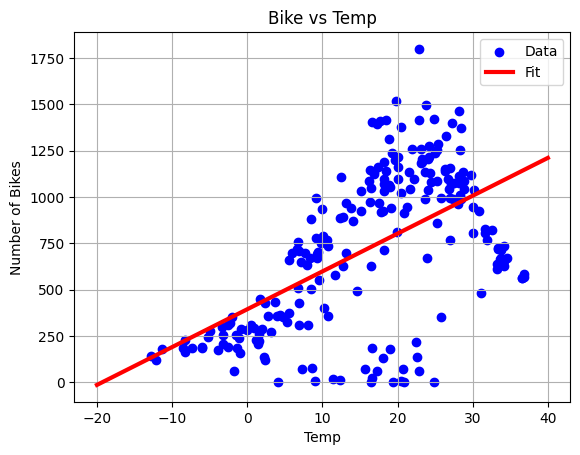

In [101]:
plt.scatter(x_train_temp, y_train_temp, label='Data', color='blue')
x= tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label= 'Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bike vs Temp')
plt.ylabel('Number of Bikes')
plt.xlabel('Temp')
plt.grid(True)
plt.show()

### Multiple Linear Regrassion

In [102]:
def get_xy(dataframe, y_label, x_label= None):
    dataframe= copy.deepcopy(dataframe)
    if x_label is None:
        x= dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_label)== 1:
            x= dataframe[x_label[0]].values.reshape(-1,1)
        else:
            x= dataframe[x_label].values

    y= dataframe[y_label].values.reshape(-1,1)
    data= np.hstack((x, y))

    return data, x, y



In [103]:
df = df.sample(frac=1).reset_index(drop=True)

train_end = int(0.6 * len(df))
valid_end = int(0.8 * len(df))

train = df.iloc[:train_end]
valid = df.iloc[train_end:valid_end]
test = df.iloc[valid_end:]

_, x_train_all, y_train_all= get_xy(train, 'bike_count', x_label=df.columns[1:])
_, x_val_all, y_val_all= get_xy(val, 'bike_count', x_label=df.columns[1:])
_, x_test_all, y_test_all= get_xy(test, 'bike_count', x_label=df.columns[1:])

In [104]:
all_reg= LinearRegression()
all_reg.fit(x_test_all, y_test_all)

LinearRegression()

In [105]:
all_reg.score(x_test_all, y_test_all)

0.5326494078365094

### Regression with Neural Network

In [106]:
  def plot_loss(history):
    plt.plot(history.history['loss'], label= 'loss')
    plt.plot(history.history['val_loss'], label= 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [107]:
temp_normalizer= tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [108]:
temp_nn_model= tf.keras.Sequential([
      temp_normalizer,
      tf.keras.layers.Dense(1)
])

In [109]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [110]:
history= temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp,
    epochs= 100,
    validation_data= (x_val_temp, y_val_temp)
)

Epoch 1/100
7/7 [==============================] - 1s 44ms/step - loss: 698225.8125 - val_loss: 548033.9375
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 696918.4375 - val_loss: 547017.4375
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 695644.9375 - val_loss: 545992.0625
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 694351.1875 - val_loss: 544967.1250
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 693056.5000 - val_loss: 543941.4375
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 691779.4375 - val_loss: 542908.5625
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 690487.3125 - val_loss: 541876.6875
Epoch 8/100
7/7 [==============================] - 0s 16ms/step - loss: 689204.0625 - val_loss: 540844.0625
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 687887.6250 - val_loss: 539822.1250
Epoch 10/100
7/7 [==========

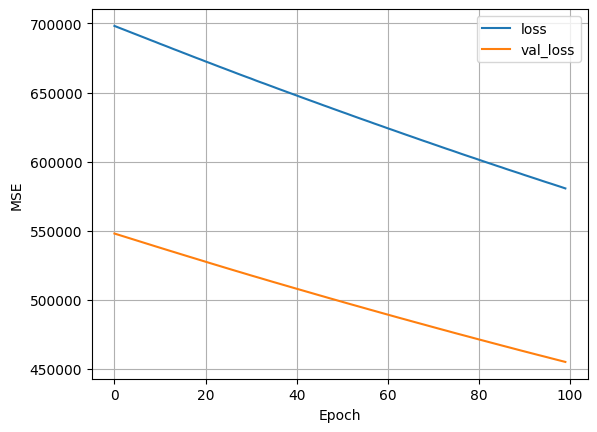

In [111]:
plot_loss(history)

In [112]:
history= temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp,
    epochs= 100,
    validation_data= (x_val_temp, y_val_temp)
)

Epoch 1/100
7/7 [==============================] - 0s 23ms/step - loss: 579639.8125 - val_loss: 454328.2188
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 578565.3125 - val_loss: 453493.8750
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 577520.5625 - val_loss: 452651.4375
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 576447.0625 - val_loss: 451815.3125
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 575387.6250 - val_loss: 450979.0000
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 574341.2500 - val_loss: 450142.0625
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 573259.3125 - val_loss: 449321.0000
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 572223.0625 - val_loss: 448495.7812
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 571173.5000 - val_loss: 447671.7188
Epoch 10/100
7/7 [=================

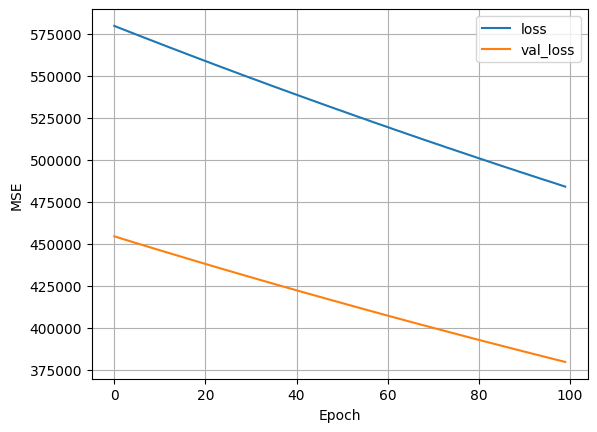

In [113]:
plot_loss(history)

In [114]:
history= temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp,
    epochs= 1000,
    validation_data= (x_val_temp, y_val_temp)
)

Epoch 1/1000
7/7 [==============================] - 0s 19ms/step - loss: 483088.2500 - val_loss: 378862.3750
Epoch 2/1000
7/7 [==============================] - 0s 8ms/step - loss: 482220.4062 - val_loss: 378187.1250
Epoch 3/1000
7/7 [==============================] - 0s 7ms/step - loss: 481345.6875 - val_loss: 377514.7812
Epoch 4/1000
7/7 [==============================] - 0s 6ms/step - loss: 480501.8750 - val_loss: 376832.0000
Epoch 5/1000
7/7 [==============================] - 0s 9ms/step - loss: 479599.1250 - val_loss: 376172.7188
Epoch 6/1000
7/7 [==============================] - 0s 10ms/step - loss: 478765.0312 - val_loss: 375500.1250
Epoch 7/1000
7/7 [==============================] - 0s 7ms/step - loss: 477907.5938 - val_loss: 374830.3125
Epoch 8/1000
7/7 [==============================] - 0s 7ms/step - loss: 477040.5625 - val_loss: 374160.9062
Epoch 9/1000
7/7 [==============================] - 0s 10ms/step - loss: 476171.8750 - val_loss: 373498.7812
Epoch 10/1000
7/7 [======

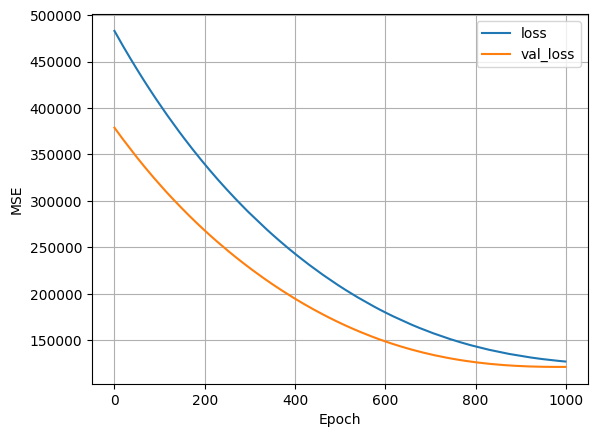

In [115]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


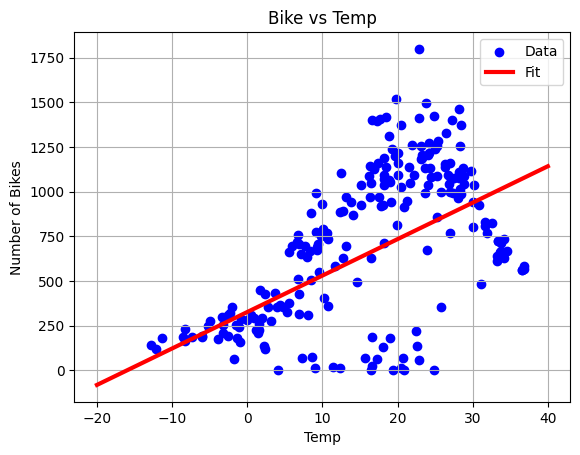

In [116]:
plt.scatter(x_train_temp, y_train_temp, label='Data', color='blue')
x= tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label= 'Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bike vs Temp')
plt.ylabel('Number of Bikes')
plt.xlabel('Temp')
plt.grid(True)
plt.show()

### Neural Nework

In [117]:
temp_normalizer= tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

nn_model= tf.keras.Sequential([
      temp_normalizer,
      tf.keras.layers.Dense(32, activation= 'relu'),
      tf.keras.layers.Dense(32, activation= 'relu'),
      tf.keras.layers.Dense(1, activation= 'relu'),
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [118]:
history= nn_model.fit(
    x_train_temp, y_train_temp,
    validation_data=(x_val_temp, y_val_temp),
    epochs=100
)

Epoch 1/100
7/7 [==============================] - 2s 114ms/step - loss: 698824.5000 - val_loss: 549007.8125
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 698668.8750 - val_loss: 548879.2500
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 698495.5625 - val_loss: 548680.0625
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 698252.8750 - val_loss: 548442.8750
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 697981.3125 - val_loss: 548190.3750
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 697696.1250 - val_loss: 547911.3750
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 697378.4375 - val_loss: 547606.1250
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 697011.5625 - val_loss: 547261.1250
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 696592.9375 - val_loss: 546860.9375
Epoch 10/100
7/7 [=============

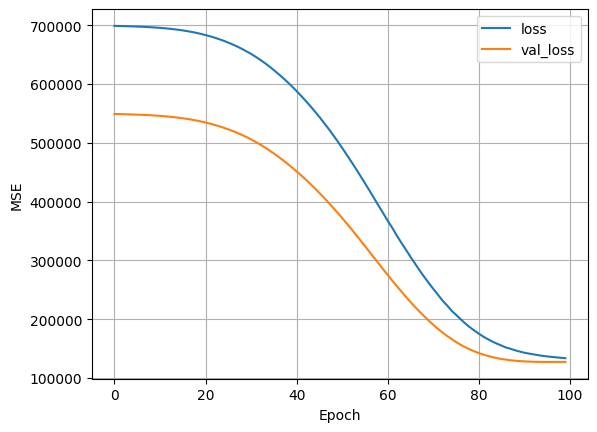

In [119]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


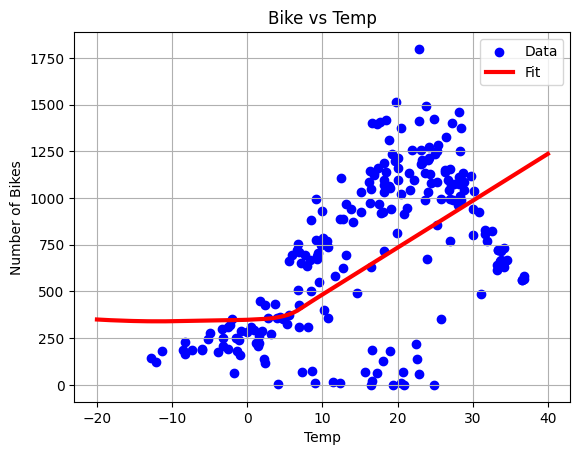

In [120]:
plt.scatter(x_train_temp, y_train_temp, label='Data', color='blue')
x= tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label= 'Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bike vs Temp')
plt.ylabel('Number of Bikes')
plt.xlabel('Temp')
plt.grid(True)
plt.show()

In [121]:
all_normalizer= tf.keras.layers.Normalization(input_shape=(6,), axis=None)
all_normalizer.adapt(x_train_all)

nn_model= tf.keras.Sequential([
      all_normalizer,
      tf.keras.layers.Dense(32, activation= 'relu'),
      tf.keras.layers.Dense(32, activation= 'relu'),
      tf.keras.layers.Dense(1, activation= 'relu'),
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [122]:
history= nn_model.fit(
    x_train_all, y_train_all,
    validation_data=(x_val_all, y_val_all),
    epochs=100
)

Epoch 1/100
7/7 [==============================] - 1s 30ms/step - loss: 706641.2500 - val_loss: 549092.6875
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 706463.1250 - val_loss: 548924.0000
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 706253.5625 - val_loss: 548731.5000
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 705998.7500 - val_loss: 548499.6875
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 705705.0625 - val_loss: 548226.0000
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 705359.4375 - val_loss: 547897.6875
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 704927.5000 - val_loss: 547497.4375
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 704405.1875 - val_loss: 546994.0625
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 703731.9375 - val_loss: 546363.1875
Epoch 10/100
7/7 [=============

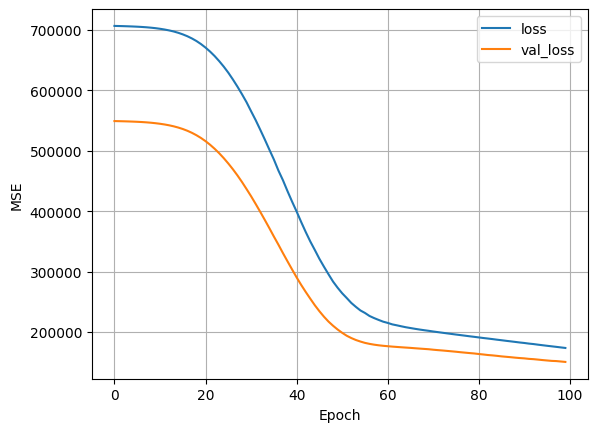

In [123]:
plot_loss(history)

In [124]:
all_reg.predict(x_test_all)

array([[ 996.06199929],
       [ 430.73102338],
       [ 391.77630083],
       [ 841.12279652],
       [ 365.5193785 ],
       [1000.8617483 ],
       [ 359.98799799],
       [ 964.74393542],
       [ 351.00830718],
       [ 313.08755921],
       [ 865.27851915],
       [ 857.00546463],
       [ 704.80032506],
       [ 821.05121878],
       [ 610.30453162],
       [1028.72051034],
       [ 382.01709855],
       [ 388.79704985],
       [1172.88665625],
       [ 383.99570241],
       [1018.4431799 ],
       [ 751.07116309],
       [ 921.09671752],
       [ 681.71459658],
       [ 630.65595394],
       [ 209.00665662],
       [ 573.16263265],
       [ 152.90426165],
       [ 570.75923719],
       [ 737.99399387],
       [1020.7348087 ],
       [ 205.7531429 ],
       [ 168.95390133],
       [ 780.20588458],
       [ 263.17666767],
       [ 921.41544057],
       [ 751.97840096],
       [1006.62226709],
       [ 971.84399188],
       [ 369.59574022],
       [ 834.01390971],
       [1132.061

In [125]:
y_pred_lr= all_reg.predict(x_test_all)
y_pred_nn= nn_model.predict(x_test_all)

3/3 [==============================] - 0s 5ms/step


In [126]:
def MSE(y_pred, y_real):
    return np.square(y_pred-y_real).mean()

In [127]:
MSE(y_pred_lr, y_test_all)

83115.05460249701

In [128]:
MSE(y_pred_nn, y_test_all)

146929.11243970977

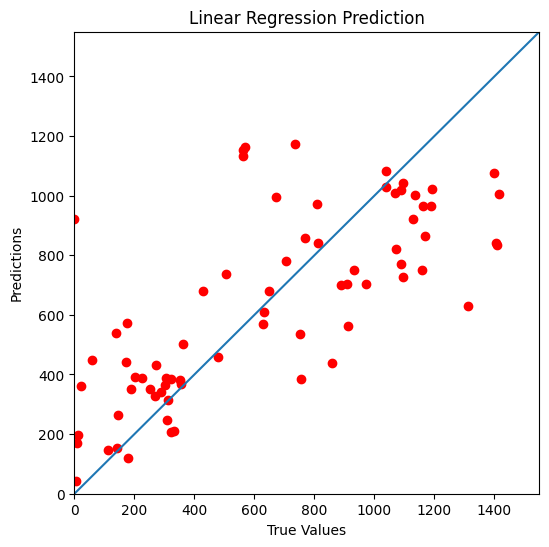

In [129]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_all, y_pred_lr, label='Linear Reg. Pred', c='red')
plt.title('Linear Regression Prediction')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims= [0, 1550]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

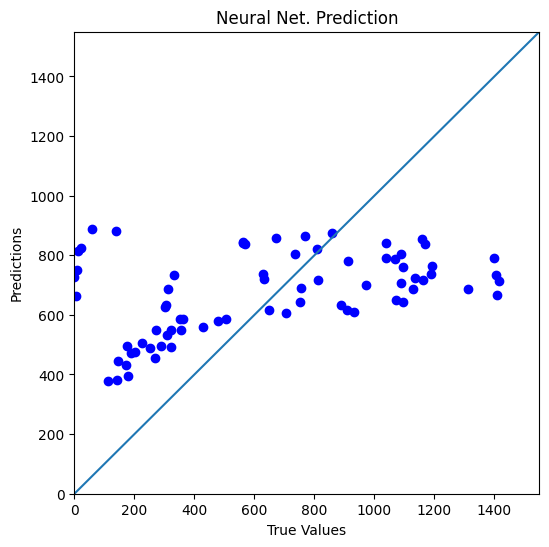

In [130]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_all, y_pred_nn, label='Neural Net Pred', c='blue')
plt.title('Neural Net. Prediction')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims= [0, 1550]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

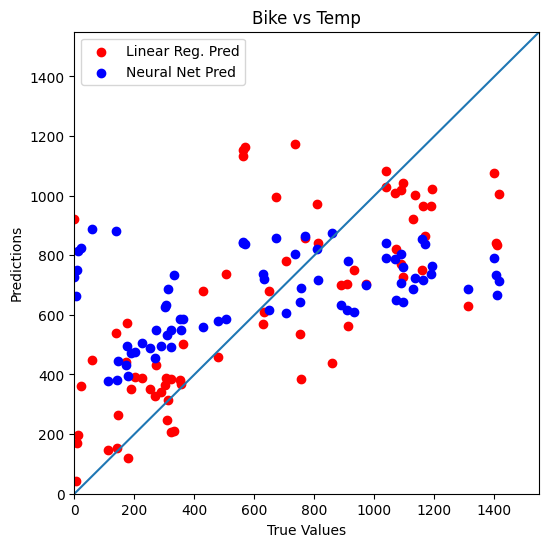

In [131]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_all, y_pred_lr, label='Linear Reg. Pred', c='red')
plt.scatter(y_test_all, y_pred_nn, label='Neural Net Pred', c='blue')
plt.legend()
plt.title('Bike vs Temp')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims= [0, 1550]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()